# Working out how to detect faces in a live video

## Imports

In [76]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

Import Haarcascade

In [77]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

## Helper funcs

In [78]:
def return_largest(a,b):
    """Compare a,b and reutrn largest"""
    
    def calculate_delta(x):
        """calculate the size of face"""
        x,y,w,h = x
        return abs(x-w) * abs(y-h)
    
    if calculate_delta(a) > calculate_delta(b):
        return a
    else:
        return b

Function to detect face

In [79]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

Detect adjacent faces with single boxes

In [80]:
def adj_detect_face(img):
    """Dectect faces in an image with no overlaps
    Arg img: an image
    
    Result: 
    face_img = image with bounding boxes
    face-rects = array of arrays, each array is corners of face bounding box
    """
    
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img, face_rects

In [81]:
def adj_detect_largest_face(img):
    """Dectect largest face in image
    Arg img: an image
    img: image with bounding box on largest face
    largest: array containing the coords of largest face (in regards to image)
    center: center location of face in image
    """
    largest = [0,0,0,0]
    center = [0,0] #init as center of screen
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    if len(face_rects) > 1: # only one face so unpack it
        x,y,w,h = face_rect[0]
        center = x+w,y+h
    else: #find largest face
        for x,y,w,h in face_rects:
            # print(f"{largest=}: {type(largest)}")
            largest = return_largest(largest,[x,y,w,h])
            # print(f"{largest=}: {type(largest)}")
        # once largest found sent center
        x,y,w,h = largest
        center = int(x+w/2), int(y+h/2) # assumes correct ordering (safe assumption)
    
    
    # # uncomment to draw box
    for (x,y,w,h) in [largest]:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
    # # uncomment to mark center
    # ToDo for sanity checks
        
    return face_img, largest, center

## Testing

In [82]:
horus = cv2.imread('DATA/livingstone.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

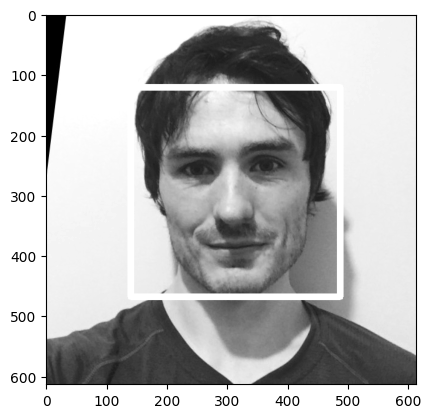

In [83]:
result = detect_face(horus)
plt.imshow(result,cmap='gray')

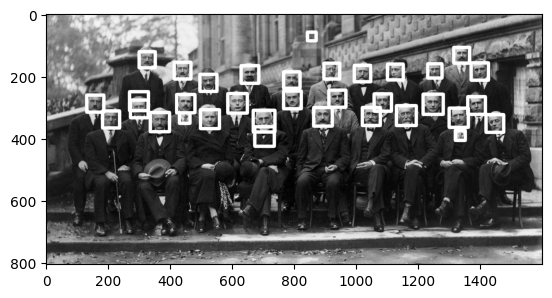

In [84]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

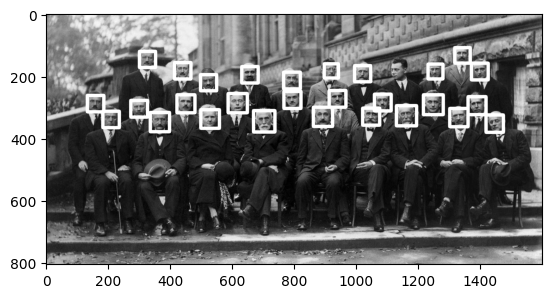

In [85]:
# Doesn't detect the side face.
result, _ = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

largest=[139, 121, 344, 344]: <class 'list'>
center=(311, 293): <class 'tuple'>


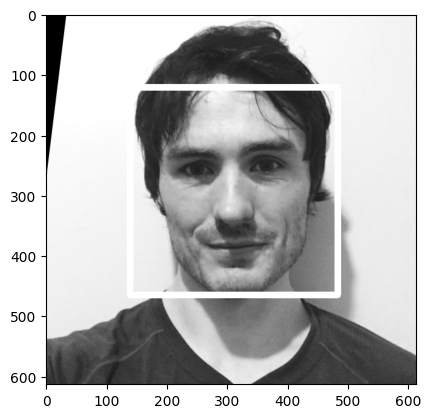

In [86]:
result, largest, center = adj_detect_largest_face(horus)
plt.imshow(result,cmap='gray')
print(f"{largest=}: {type(largest)}")
print(f"{center=}: {type(center)}") # x then y, x is left 0 to right inf, y is top 0 down to inf

## Run with default camera making bounding box on faces

In [1]:
#warning this needs force quitting in macOS

cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    #frame = detect_face(frame)
    frame, face_rects = adj_detect_face(frame)
    
    if len(face_rects) > 1:
        print(face_rects)
 
    cv2.imshow('Video Face Detection', frame) 
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined